In [1]:
####1.Import the necessary libraries if you are starting a new notebook.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_style("whitegrid")

%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
####2.Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
###What should we do with the customer_id column?
### Drop or use as index
customer_df.set_index('Customer', inplace=True)



In [4]:
## Checking for unique values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [5]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.columns =[col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns #formatting the column names as necessary

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
#customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date']).dt.to_period('M')
#customer_df['effective_to_date'] ### code does not work when trying to generate line and cat plots

In [8]:
###3.Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
###numerical_df = customer_df.select_dtypes()
###categorical_df = customer_df.select_dtypes()

numerical_df= customer_df.select_dtypes(np.number)
categorical_df= customer_df.select_dtypes(np.object)

numerical_df.head() ###preview


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
categorical_df.head() ###preview

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
####4.Plot every categorical variable. What can you see in the plots? 
####Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the 
###column on the x-axis and an appropriate measure on the y-axis. 
####However, this time you will try a different plot. This time in each plot for the categorical variable you will have
####each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis


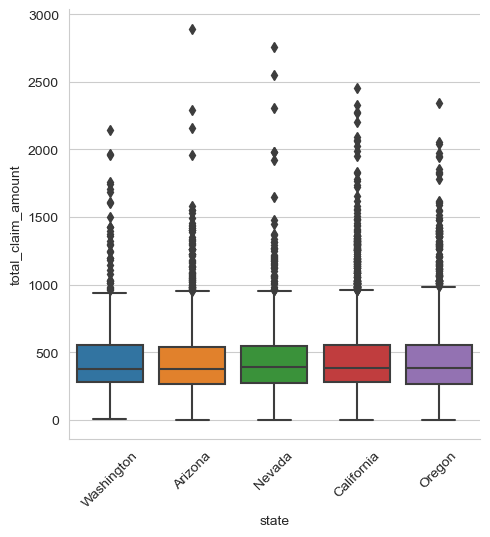

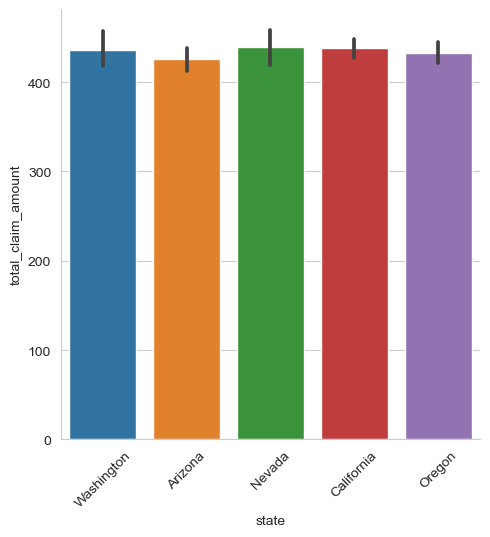

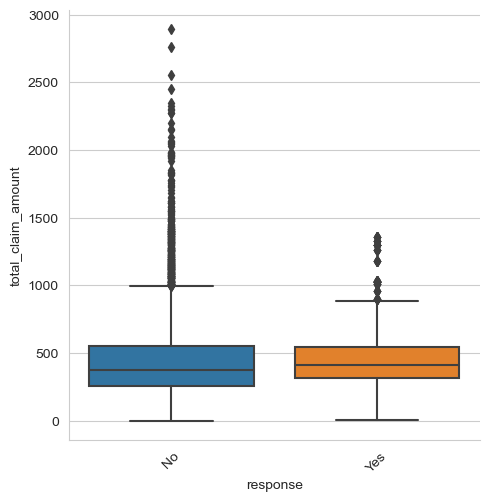

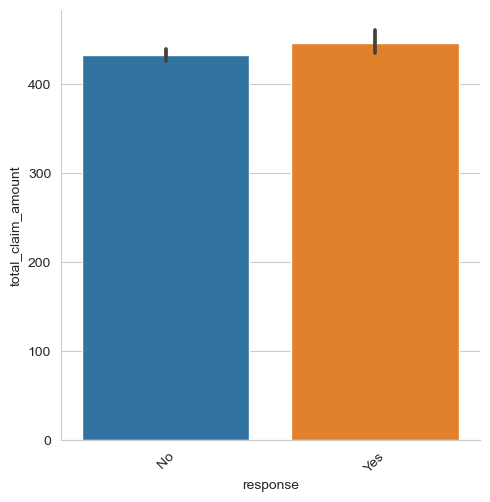

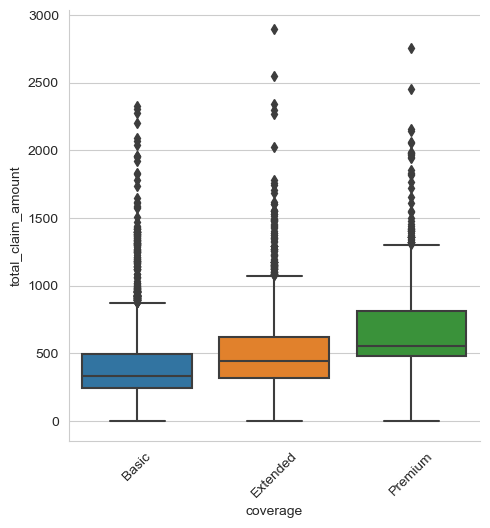

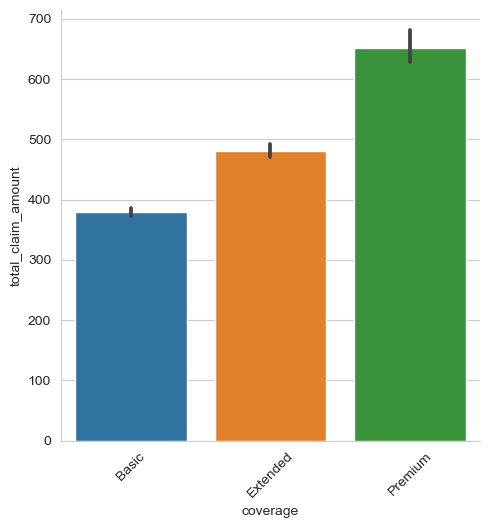

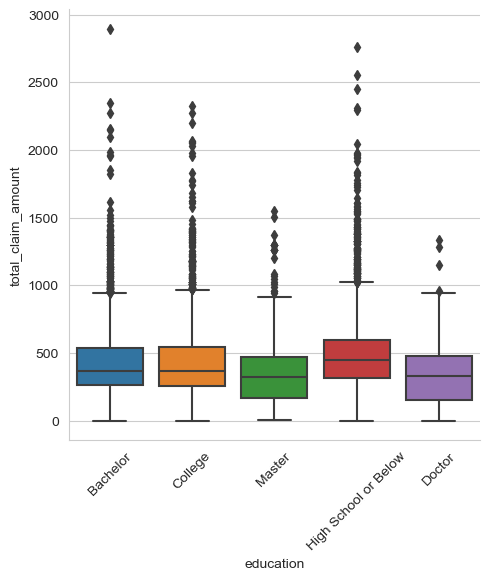

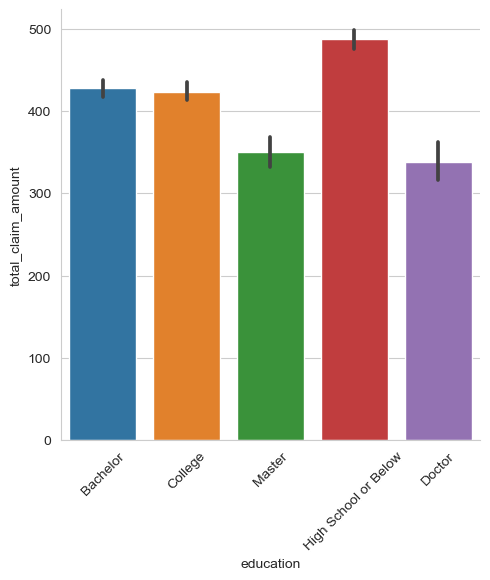

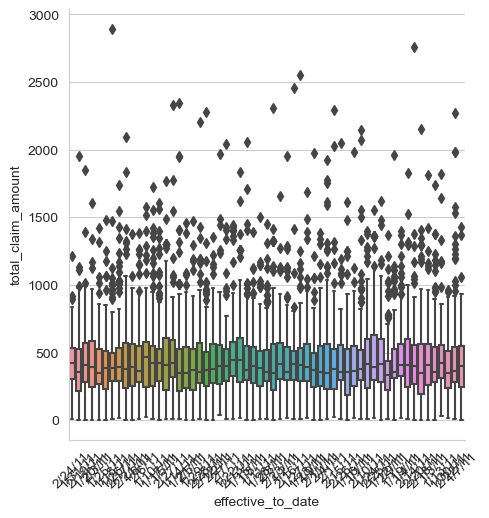

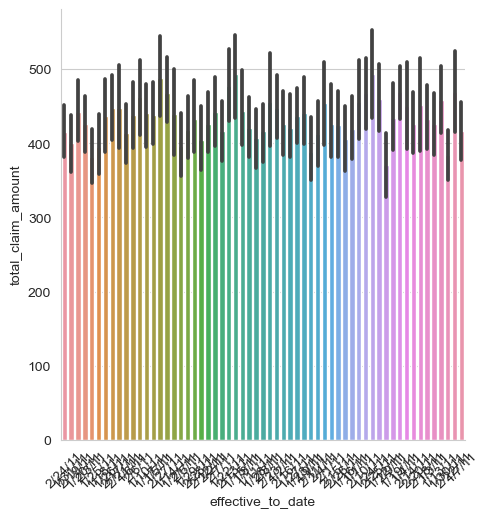

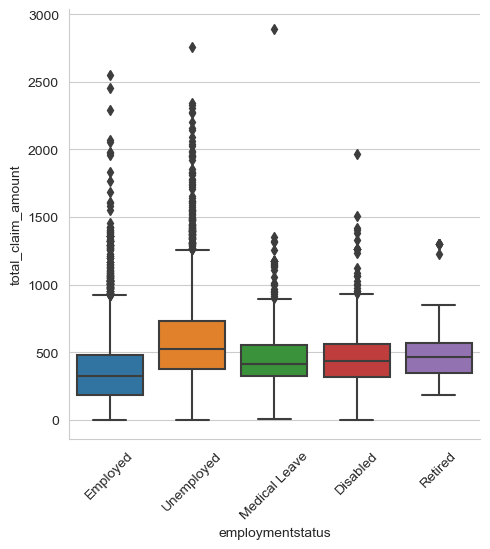

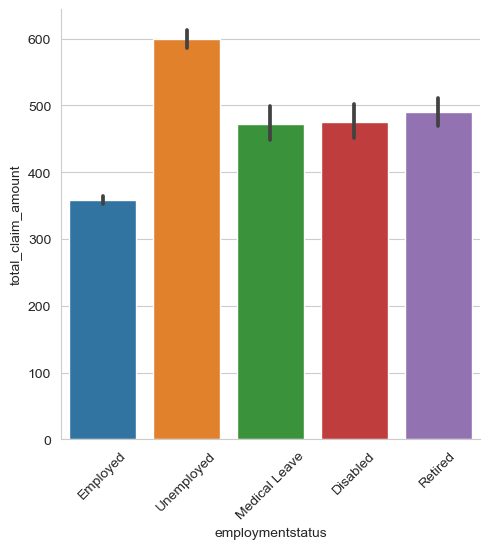

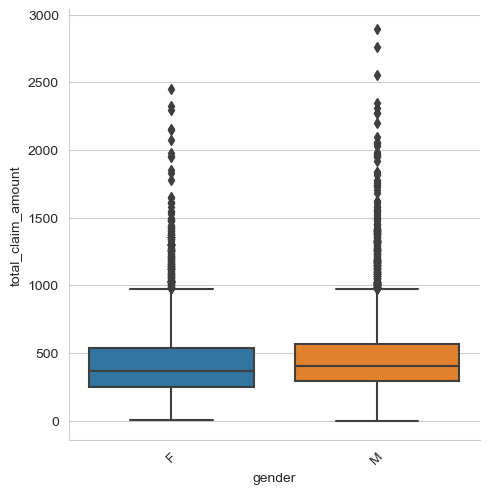

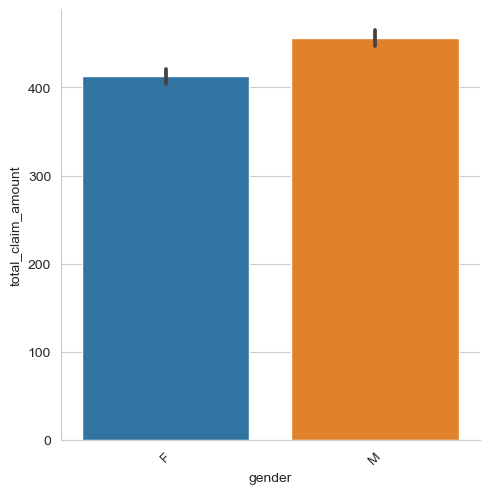

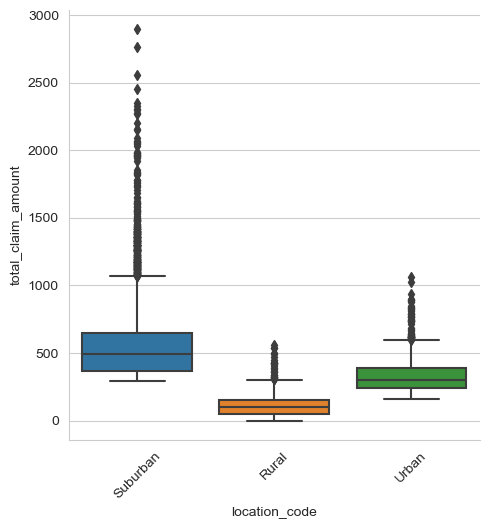

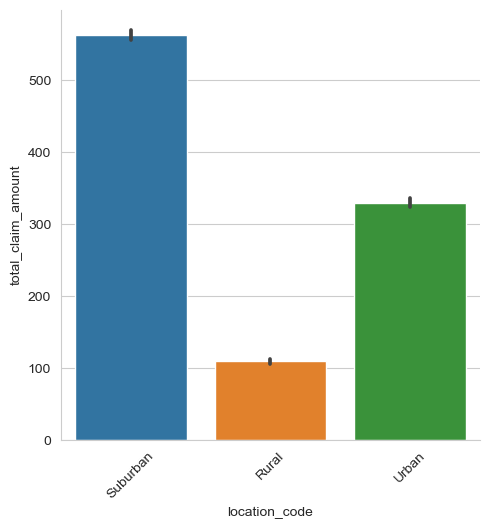

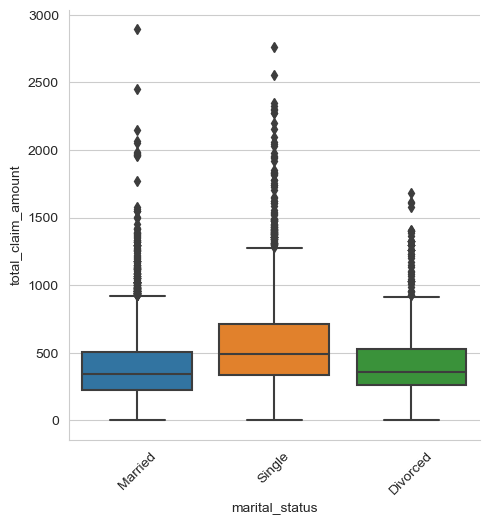

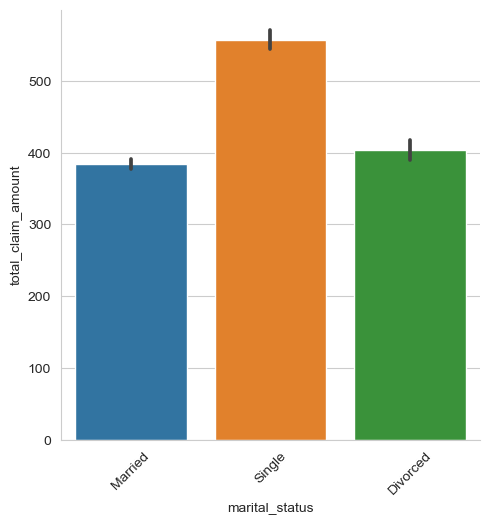

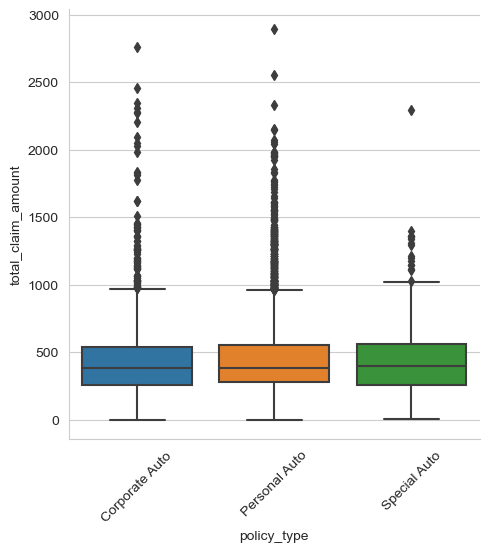

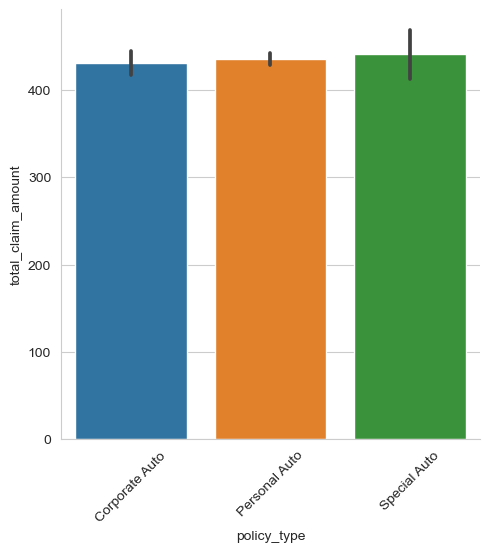

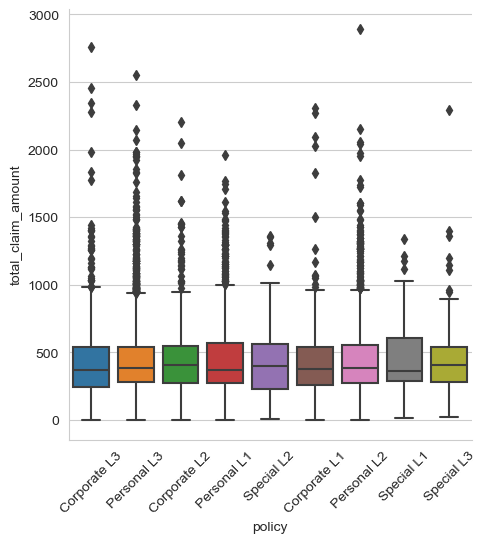

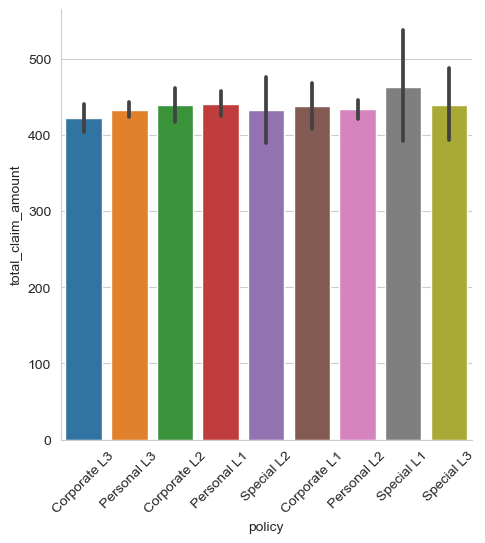

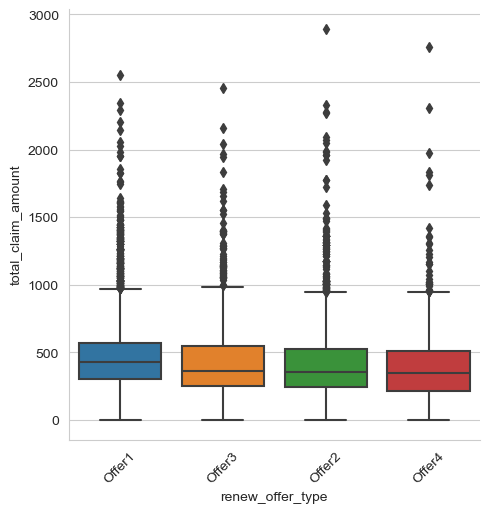

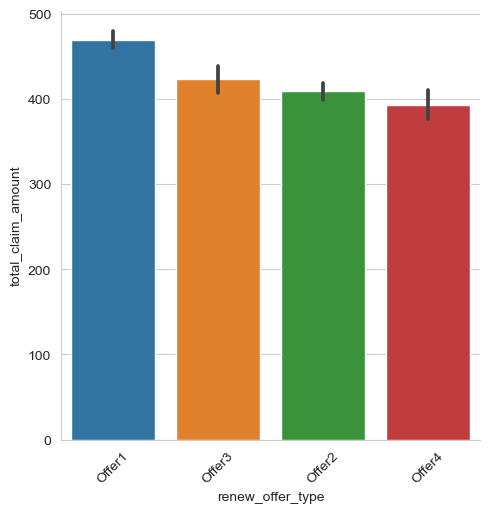

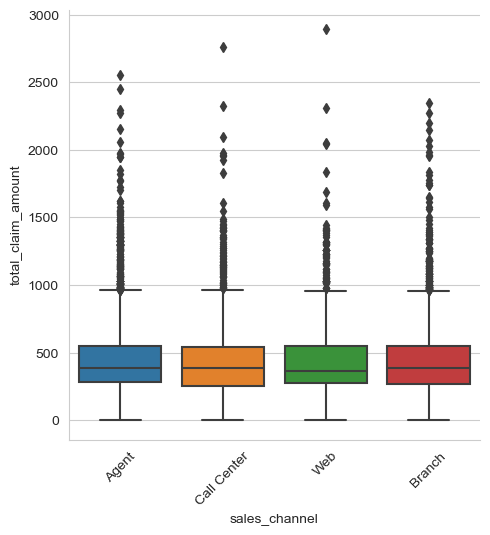

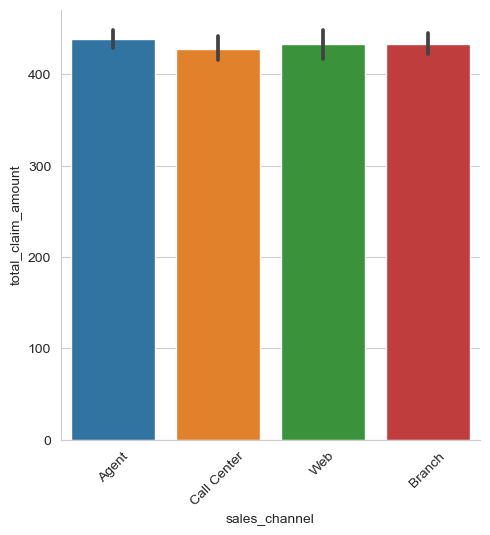

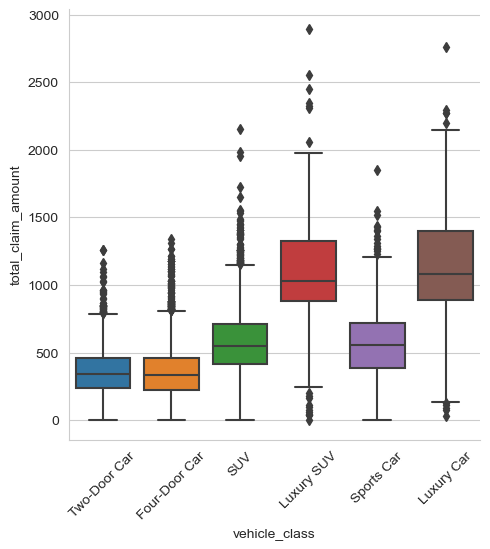

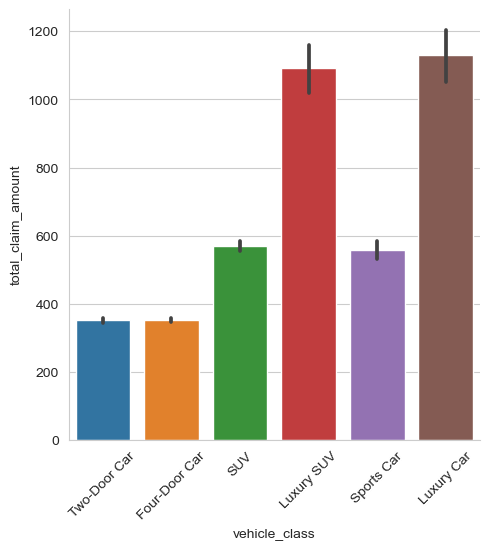

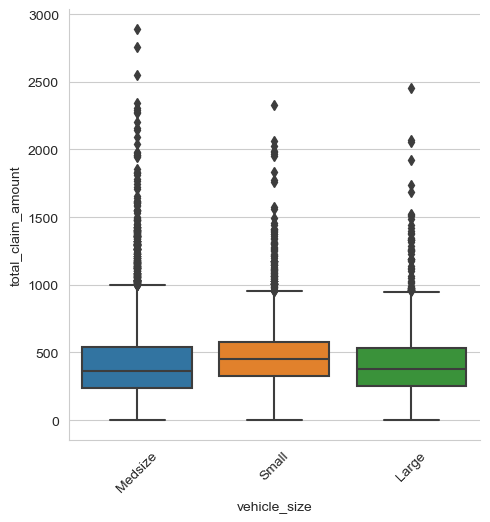

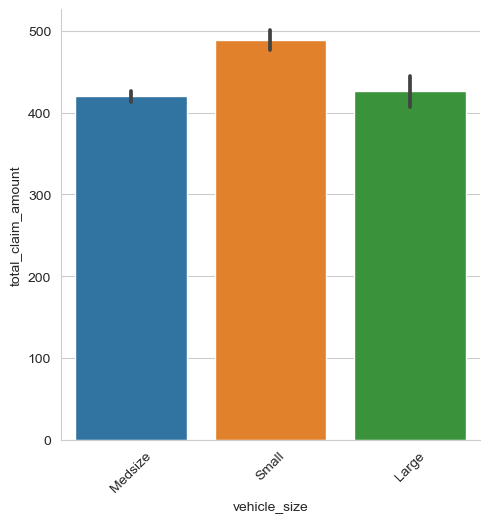

In [11]:
for col in customer_df.select_dtypes(np.object).columns:
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='box').set_xticklabels(rotation=45)
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='bar').set_xticklabels(rotation=45)
    plt.show()

 **`Plot Observations`**

For variables **state**, **response**, **gender**, **policy_type**, **policy**, **renew_offer_type**, **sales_channel** and **vehicle_size**, their unique categories have insignificant variation between each other in terms of explaining the total_claim_amount (Y-axis). Therefore, we can drop these variables from the model. However, the variation between categories in the **vehicle_size** variable is appears to be on the brink of being significant, and seems to be intrinsically related to **vehicle_class** (which actually has significant variation). As such, the variable **vehicle_size**  should be retained.

**`Dropping of Variables`**

In [12]:
variables_to_drop= ['state','response','gender','policy_type', 'renew_offer_type', 'sales_channel'] ###created a loop to drop variables more concisely
    

for variable in variables_to_drop:
    customer_df = customer_df.drop(variable, axis=1)

customer_df.head()  ###checking if the variables have been successfully dropped


,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,
BU79786,2763.519279,Basic,Bachelor,2/24/11,Employed,56274,Suburban,Married,69,32,5,0,1,Corporate L3,384.811147,Two-Door Car,Medsize
QZ44356,6979.535903,Extended,Bachelor,1/31/11,Unemployed,0,Suburban,Single,94,13,42,0,8,Personal L3,1131.464935,Four-Door Car,Medsize
AI49188,12887.431650,Premium,Bachelor,2/19/11,Employed,48767,Suburban,Married,108,18,38,0,2,Personal L3,566.472247,Two-Door Car,Medsize
WW63253,7645.861827,Basic,Bachelor,1/20/11,Unemployed,0,Suburban,Married,106,18,65,0,7,Corporate L2,529.881344,SUV,Medsize
HB64268,2813.692575,Basic,Bachelor,2/3/11,Employed,43836,Rural,Single,73,12,44,0,1,Personal L1,138.130879,Four-Door Car,Medsize


In [13]:
####For the categorical data, check if there is any data cleaning that need to perform. 
####Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
###Discuss if this information might in some way be used for data cleaning.

**`Binning of categories`**

As for subcategories in variables **education**, **employmentstatus**, **marital_status**, and **vehicle_class*, there is significant variation as a whole which explains the **total_claim_amount**. However, some of these categories can be combined because they have no significant variation between each other. 

**`education`**

In [14]:
def clean_education(x):  ### Bachelor and College grouped together as undergrad, Master and Doctor grouped together as postgrad (for variation between these categories, see corresponding above plot)
    if x in ['Bachelor', 'College']:
        return 'Undergraduate education'
    elif x in ['Master', 'Doctor']:
        return 'Postgraduate education'
    else:
        return(x)
customer_df['education']= list(map(clean_education, customer_df['education']))
customer_df['education'].unique()

array(['Undergraduate education', 'Postgraduate education',
       'High School or Below'], dtype=object)

**`employmentstatus`**

In [15]:
def clean_employmentstatus(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']: # these categories have no significant variation from each other
        return 'Other'
    else:
        return x

customer_df['employmentstatus'] = list(map(clean_employmentstatus, customer_df['employmentstatus']))

In [16]:
customer_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Other'], dtype=object)

**`marital_status`**

In [17]:
def clean_maritalstatus(x):
    if x in ['Married', 'Divorced']:  ##no sigfnificant variation in explanatory power between categories 'Married' and 'Divorced'
        return 'Married or Divorced'
    else:
        return(x)
customer_df['marital_status']=list(map(clean_maritalstatus, customer_df['marital_status']))

In [18]:
customer_df['marital_status'].unique()

array(['Married or Divorced', 'Single'], dtype=object)

**`vehicle_class`**

In [19]:
def clean_vehicleclass(x):
    if x in ['Two Door Car', 'Four Door Car']: #insignificant difference in variation between 'Two Door Car' and 'Four Door Car', as well as between 'SUV' and 'Sports Car'
        return 'Sedan'
    elif x in ['SUV', 'Sports Car']:
        return 'Sports'
    else:
        return 'Luxury'
customer_df['vehicle_class']= list(map(clean_vehicleclass, customer_df['vehicle_class']))

In [20]:
customer_df['vehicle_class'].unique()

array(['Luxury', 'Sports'], dtype=object)

In [21]:
####For the categorical data, check if there is any data cleaning that need to perform. 
####Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
###Discuss if this information might in some way be used for data cleaning.

In [22]:
categorical_df.isna().sum()

state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [23]:
###Lab | Feature extraction

In [24]:
###1.Open the categoricals variable we created before. 

**'Done and dusted'**

In [25]:
###2.Plot all the categorical variables with the proper plot. What can you see?

**'Done and dusted'**

In [26]:
###3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

**'Done and dusted'**

In [27]:
###4.Plot time variable. Can you extract something from it?

**'I am assuming this means to plot the dates as well as the total claim amount (?!?!)'**

In [28]:
customer_df.effective_to_date.value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

In [29]:
customer_df['effective_to_date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

**`Observation`** 

All insurance policy contracts were concluded on just two months-- January and February, of the year 2011. We can attempt to plot all the dates (day) using a line plot and a Seaborn cat plot, but it is not clear how that level of granularity would be useful in terms of business decisions...

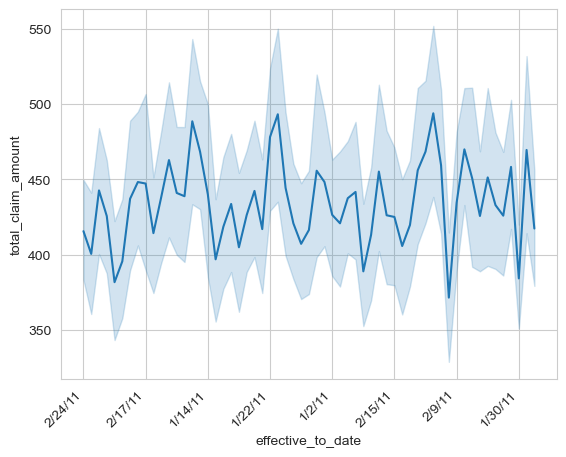

In [31]:
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

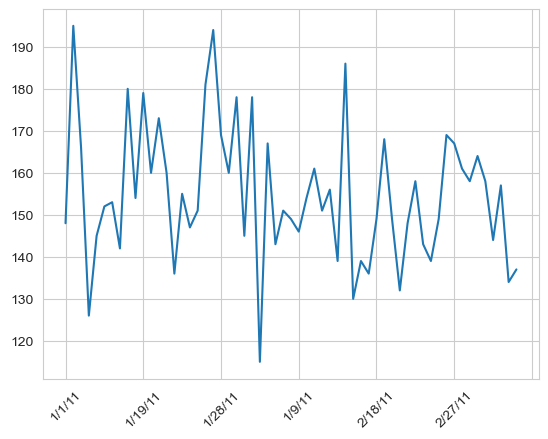

In [32]:
uniquecounts = customer_df['effective_to_date'].value_counts().sort_index() ###prompts Seaborn to produce a line plot with the counts of all unique values occuring on a singular date, with sort.index() sorting the count by index (in this case, the date)
sns.lineplot(x=uniquecounts.index, y=uniquecounts.values)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

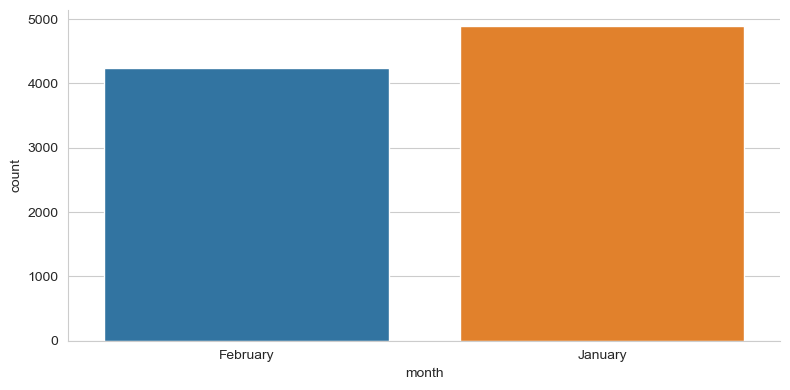

In [33]:
customer_df['month'] = pd.to_datetime(customer_df['effective_to_date']).dt.month_name() ###creating a new column by extracting only the month from the date
sns.catplot(x='month', kind='count', data=customer_df, height=4, aspect=2)


###Looks like a regular seaborn countplot since only two months are present in the data set


In [35]:
100-((4898+4263)/100) ###percentage difference in number of insurance policies between the two months

8.39

**`Observation`**: The sum of insurance policies taken out in January are 8.39% higher than in February

In [ ]:
sns.boxplot(x='month', y='total_claim_amount', data=customer_df)
plt.title('Distribution of Total Claim Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(2)) ###because there are only two months
plt.show()

**`Observation`**: When the month of all of the effective_to_date(s) are plotted against total_claim_amount, we can observe that there is not much variation between both months. Therefore, we can drop the date column as it has little impact on the model.

In [36]:
customer_df.info() ###double checking remaining columns

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   coverage                       9134 non-null   object 
 2   education                      9134 non-null   object 
 3   effective_to_date              9134 non-null   object 
 4   employmentstatus               9134 non-null   object 
 5   income                         9134 non-null   int64  
 6   location_code                  9134 non-null   object 
 7   marital_status                 9134 non-null   object 
 8   monthly_premium_auto           9134 non-null   int64  
 9   months_since_last_claim        9134 non-null   int64  
 10  months_since_policy_inception  9134 non-null   int64  
 11  number_of_open_complaints      9134 non-null   int64  
 12  number_of_policies             9134 non-null

In [39]:
customer_df = customer_df.drop('effective_to_date', axis=1) ###dropped effective_to_date from data frame

In [40]:
customer_df.head()

,customer_lifetime_value,coverage,education,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,total_claim_amount,vehicle_class,vehicle_size,month
Customer,,,,,,,,,,,,,,,,,
BU79786,2763.519279,Basic,Undergraduate education,Employed,56274,Suburban,Married or Divorced,69,32,5,0,1,Corporate L3,384.811147,Luxury,Medsize,February
QZ44356,6979.535903,Extended,Undergraduate education,Unemployed,0,Suburban,Single,94,13,42,0,8,Personal L3,1131.464935,Luxury,Medsize,January
AI49188,12887.431650,Premium,Undergraduate education,Employed,48767,Suburban,Married or Divorced,108,18,38,0,2,Personal L3,566.472247,Luxury,Medsize,February
WW63253,7645.861827,Basic,Undergraduate education,Unemployed,0,Suburban,Married or Divorced,106,18,65,0,7,Corporate L2,529.881344,Sports,Medsize,January
HB64268,2813.692575,Basic,Undergraduate education,Employed,43836,Rural,Single,73,12,44,0,1,Personal L1,138.130879,Luxury,Medsize,February
